In [0]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# UNZIP ALL ZIP FILES

In [0]:
from zipfile import ZipFile
file_name = "drive/My Drive/intel-image-classification.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')
  

Done


# TRAIN DATA

In [0]:
from zipfile import ZipFile
file_name = "seg_train.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')
  

Done


# TEST DATA

In [0]:
from zipfile import ZipFile
file_name = "seg_test.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')
  

Done


# OBSERVATION

Populating the interactive namespace from numpy and matplotlib


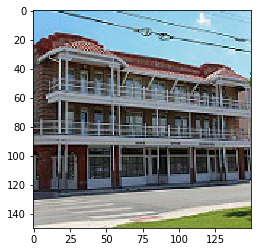

In [0]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('../content/seg_train/buildings/1001.jpg')
imgplot = plt.imshow(img)
plt.show()

# LISTING ALL THE FILE NAME

In [0]:
import os
building_list_dir = os.listdir("../content/seg_train/buildings")
forest_list_dir = os.listdir("../content/seg_train/forest")
glacier_list_dir = os.listdir("../content/seg_train/glacier")
mountain_list_dir = os.listdir("../content/seg_train/mountain")
sea_list_dir = os.listdir("../content/seg_train/sea")
street_list_dir = os.listdir("../content/seg_train/street")


In [0]:
for bname in forest_list_dir[1:5]:

  print(bname)

18636.jpg
4352.jpg
2787.jpg
2661.jpg


In [0]:

newb_list_dir = [os.path.join("../content/seg_train/buildings", bname) for bname in building_list_dir[1:5]]
newf_list_dir = [os.path.join("../content/seg_train/forest", fname) for fname in forest_list_dir[1:5]]
newg_list_dir = [os.path.join("../content/seg_train/glacier", gname) for gname in glacier_list_dir[1:5]]
newm_list_dir = [os.path.join("../content/seg_train/mountain", mname) for mname in mountain_list_dir[1:5]]
newsea_list_dir = [os.path.join("../content/seg_train/sea", seaname) for seaname in sea_list_dir[1:5]]
newstreet_list_dir = [os.path.join("../content/seg_train/street", streetname) for streetname in street_list_dir[1:5]]


In [0]:
newb_list_dir

['../content/seg_train/buildings/17983.jpg',
 '../content/seg_train/buildings/12669.jpg',
 '../content/seg_train/buildings/13276.jpg',
 '../content/seg_train/buildings/16199.jpg']

# VIEWING BUILDINGS IN SUBPLOT

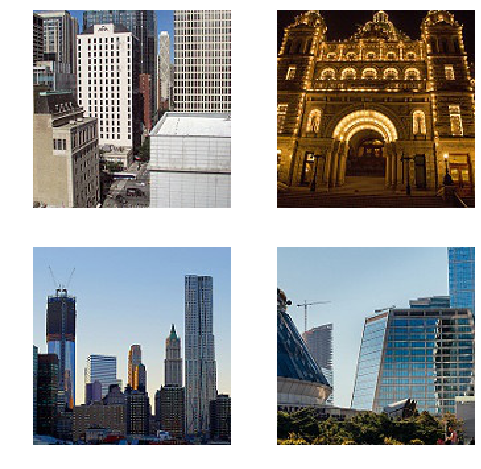

In [0]:
fig = plt.gcf()
fig.set_size_inches(8,8)
i=0
for imgpath in newb_list_dir:
  sp = plt.subplot(2,2,i+1)
  sp.axis('off')
  img = mpimg.imread(imgpath)
  sp.imshow(img)
  i = i+1

# FOREST

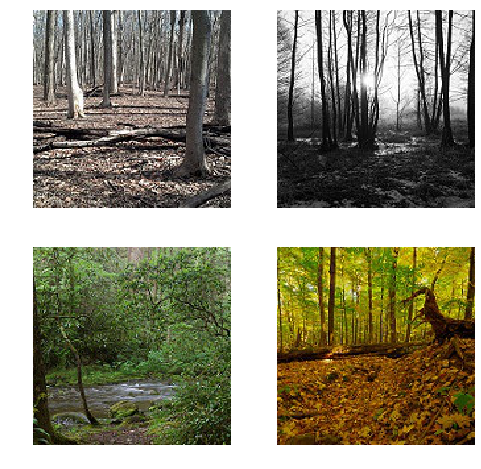

In [0]:
fig = plt.gcf()
fig.set_size_inches(8,8)
i=0
for imgpath in newf_list_dir:
  sp = plt.subplot(2,2,i+1)
  sp.axis('off')
  img = mpimg.imread(imgpath)
  sp.imshow(img)
  i = i+1

# glacier

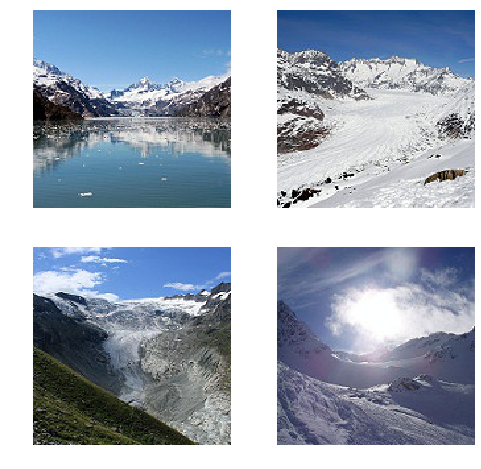

In [0]:

fig = plt.gcf()
fig.set_size_inches(8,8)
i=0
for imgpath in newg_list_dir:
  sp = plt.subplot(2,2,i+1)
  sp.axis('off')
  img = mpimg.imread(imgpath)
  sp.imshow(img)
  i = i+1

# mountain

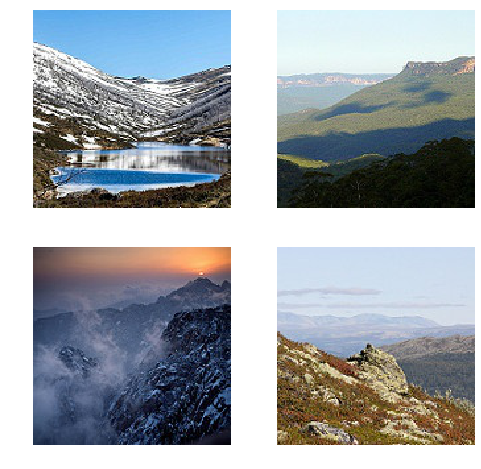

In [0]:
fig = plt.gcf()
fig.set_size_inches(8,8)
i=0
for imgpath in newm_list_dir:
  sp = plt.subplot(2,2,i+1)
  sp.axis('off')
  img = mpimg.imread(imgpath)
  sp.imshow(img)
  i = i+1

# sea

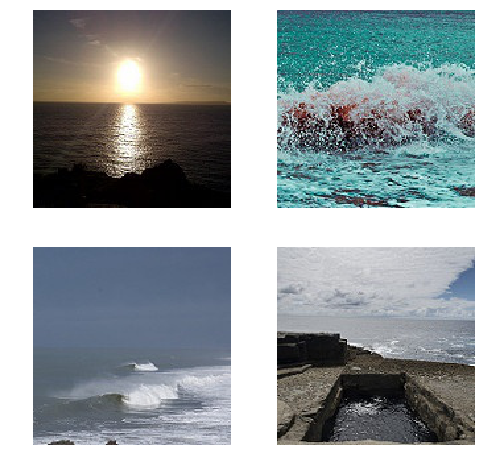

In [0]:
fig = plt.gcf()
fig.set_size_inches(8,8)
i=0
for imgpath in newsea_list_dir:
  sp = plt.subplot(2,2,i+1)
  sp.axis('off')
  img = mpimg.imread(imgpath)
  sp.imshow(img)
  i = i+1

# street

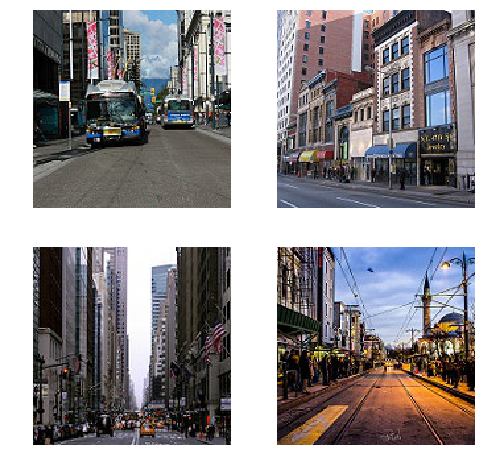

In [0]:
fig = plt.gcf()
fig.set_size_inches(8,8)
i=0
for imgpath in newstreet_list_dir:
  sp = plt.subplot(2,2,i+1)
  sp.axis('off')
  img = mpimg.imread(imgpath)
  sp.imshow(img)
  i = i+1

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
train_data = ImageDataGenerator(rescale=1./255,
                                rotation_range=40,
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                vertical_flip=True)

test_data = ImageDataGenerator(rescale=1./255)

train_generator = train_data.flow_from_directory(
                    "../content/seg_train",
                    target_size=(224,224),
                    batch_size=150,
                    class_mode="categorical")
test_generator = test_data.flow_from_directory(
                    "../content/seg_test",
                    target_size=(224,224),
                    batch_size=60,
                    class_mode="categorical")

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


# MODEL GENERATION

In [0]:

from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout

img_input = layers.Input(shape=(224,224,3))

x = Conv2D(16,3,activation="relu")(img_input)
x = MaxPooling2D(2)(x)

x = Conv2D(32,3,activation="relu")(x)
x = MaxPooling2D(2)(x)

x = Conv2D(64,3,activation="relu")(x)
x = MaxPooling2D(2)(x)

x = Conv2D(128,3,activation="relu")(x)
x = MaxPooling2D(2)(x)

x = Flatten()(x)

x = Dense(512,activation="relu")(x)

x = Dropout(0.5)(x)

x = Dense(256,activation = "sigmoid")(x)

output = Dense(6,activation = "sigmoid")(x)

model = Model(img_input,output)




# COMPILING THE MODEL

In [0]:

from tensorflow.keras.optimizers import Adam

model.compile(loss="categorical_crossentropy",
              optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.01, amsgrad=False),
              metrics=['accuracy'])

# FITING THE MODEL AND FINDING ACCURACY

In [0]:
X=model.fit_generator(generator=train_generator,
                     steps_per_epoch=100,
                      epochs=15,
                     validation_data=test_generator,
                     validation_steps=50,
                     verbose=2)

W0821 04:59:19.860918 140622857623424 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/15
100/100 - 193s - loss: 1.3902 - acc: 0.4063 - val_loss: 1.1415 - val_acc: 0.5183
Epoch 2/15
100/100 - 185s - loss: 1.1371 - acc: 0.5307 - val_loss: 1.0468 - val_acc: 0.5783
Epoch 3/15
100/100 - 186s - loss: 1.0775 - acc: 0.5610 - val_loss: 1.0149 - val_acc: 0.5850
Epoch 4/15
100/100 - 187s - loss: 1.0220 - acc: 0.5870 - val_loss: 0.8800 - val_acc: 0.6527
Epoch 5/15
100/100 - 188s - loss: 0.9897 - acc: 0.6075 - val_loss: 0.8581 - val_acc: 0.6610
Epoch 6/15
100/100 - 188s - loss: 0.9635 - acc: 0.6205 - val_loss: 0.8375 - val_acc: 0.6617
Epoch 7/15
100/100 - 187s - loss: 0.9264 - acc: 0.6379 - val_loss: 0.8213 - val_acc: 0.6943
Epoch 8/15
100/100 - 187s - loss: 0.9071 - acc: 0.6488 - val_loss: 0.7858 - val_acc: 0.7113
Epoch 9/15
100/100 - 186s - loss: 0.8886 - acc: 0.6567 - val_loss: 0.7589 - val_acc: 0.7113
Epoch 10/15
100/100 - 185s - loss: 0.8732 - acc: 0.6642 - val_loss: 0.7695 - val_acc: 0.7050
Epoch 11/15
100/100 - 186s - loss: 0.8624 - acc: 0.6720 - val_loss: 0.7541 - va

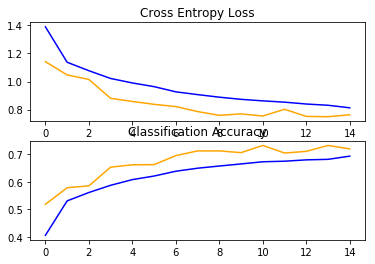

In [0]:
import sys
from matplotlib import pyplot
# plot loss
pyplot.subplot(211)
pyplot.title('Cross Entropy Loss')
pyplot.plot(X.history['loss'], color='blue', label='train')
pyplot.plot(X.history['val_loss'], color='orange', label='test')
# plot accuracy
pyplot.subplot(212)
pyplot.title('Classification Accuracy')
pyplot.plot(X.history['acc'], color='blue', label='train')
pyplot.plot(X.history['val_acc'], color='orange', label='test')
pyplot.show()

# INCEPTION V3

In [0]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2019-08-21 06:14:09--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.141.128, 2607:f8b0:400c:c06::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   127MB/s    in 0.7s    

2019-08-21 06:14:10 (127 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [0]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

load_weights = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5' 

pre_trained_model = InceptionV3(input_shape=(224,224,3),include_top=False,weights=None)
pre_trained_model.load_weights(load_weights)

In [0]:
from tensorflow.keras import Model,layers

for layer in pre_trained_model.layers:
    layer.trainable =False

last_layer = pre_trained_model.get_layer("mixed7")
output = last_layer.output

x = layers.GlobalAveragePooling2D()(output)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
y = layers.Dense(6, activation='sigmoid')(x)

model = Model(pre_trained_model.input, y)


In [0]:
from tensorflow.keras.optimizers import Adam

model.compile(loss="categorical_crossentropy",
              optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.01, amsgrad=False),
              metrics=['accuracy'])

In [0]:
X = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=10,
      validation_data=test_generator,
      validation_steps=50,
      verbose=2)

Epoch 1/10
100/100 - 210s - loss: 0.4318 - acc: 0.8436 - val_loss: 0.5721 - val_acc: 0.7703
Epoch 2/10
100/100 - 204s - loss: 0.4274 - acc: 0.8446 - val_loss: 0.5470 - val_acc: 0.7823
Epoch 3/10
100/100 - 203s - loss: 0.4225 - acc: 0.8487 - val_loss: 0.5981 - val_acc: 0.7660
Epoch 4/10
100/100 - 205s - loss: 0.4218 - acc: 0.8495 - val_loss: 0.5562 - val_acc: 0.7790
Epoch 5/10
100/100 - 204s - loss: 0.4218 - acc: 0.8464 - val_loss: 0.5744 - val_acc: 0.7750
Epoch 6/10
100/100 - 204s - loss: 0.4259 - acc: 0.8444 - val_loss: 0.5524 - val_acc: 0.7837
Epoch 7/10
100/100 - 203s - loss: 0.4006 - acc: 0.8558 - val_loss: 0.5631 - val_acc: 0.7800
Epoch 8/10
100/100 - 204s - loss: 0.4189 - acc: 0.8493 - val_loss: 0.5591 - val_acc: 0.7893
Epoch 9/10
100/100 - 203s - loss: 0.4096 - acc: 0.8518 - val_loss: 0.5629 - val_acc: 0.7823
Epoch 10/10
100/100 - 201s - loss: 0.4097 - acc: 0.8517 - val_loss: 0.5635 - val_acc: 0.7843


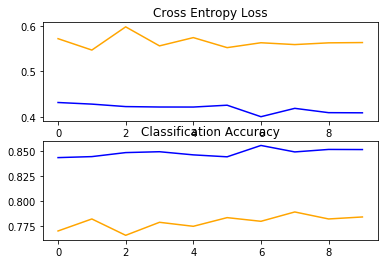

In [0]:
import sys
from matplotlib import pyplot
# plot loss
pyplot.subplot(211)
pyplot.title('Cross Entropy Loss')
pyplot.plot(X.history['loss'], color='blue', label='train')
pyplot.plot(X.history['val_loss'], color='orange', label='test')
# plot accuracy
pyplot.subplot(212)
pyplot.title('Classification Accuracy')
pyplot.plot(X.history['acc'], color='blue', label='train')
pyplot.plot(X.history['val_acc'], color='orange', label='test')
pyplot.show()

In [0]:
unfreeze = False

for layer in pre_trained_model.layers:
  if unfreeze:
    layer.trainable = True
  if layer.name == 'mixed5':
    unfreeze = True


In [0]:
from tensorflow.keras.optimizers import Adam

model.compile(loss="categorical_crossentropy",
              optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.01, amsgrad=False),
              metrics=['accuracy'])

In [0]:
X = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=15,
      validation_data=test_generator,
      validation_steps=50,
      verbose=2)

Epoch 1/15
100/100 - 228s - loss: 0.3778 - acc: 0.8699 - val_loss: 0.4415 - val_acc: 0.8640
Epoch 2/15
100/100 - 214s - loss: 0.2594 - acc: 0.9102 - val_loss: 0.2917 - val_acc: 0.8953
Epoch 3/15
100/100 - 215s - loss: 0.2301 - acc: 0.9229 - val_loss: 0.3145 - val_acc: 0.8903
Epoch 4/15
100/100 - 214s - loss: 0.1958 - acc: 0.9304 - val_loss: 0.2645 - val_acc: 0.9090
Epoch 5/15
100/100 - 215s - loss: 0.1853 - acc: 0.9347 - val_loss: 0.2764 - val_acc: 0.9113
Epoch 6/15
100/100 - 214s - loss: 0.1706 - acc: 0.9387 - val_loss: 0.2970 - val_acc: 0.9037
Epoch 7/15
100/100 - 216s - loss: 0.1539 - acc: 0.9453 - val_loss: 0.3005 - val_acc: 0.9053
Epoch 8/15
100/100 - 214s - loss: 0.1488 - acc: 0.9452 - val_loss: 0.3112 - val_acc: 0.8980
Epoch 9/15
100/100 - 213s - loss: 0.1353 - acc: 0.9517 - val_loss: 0.2662 - val_acc: 0.9070
Epoch 10/15
100/100 - 212s - loss: 0.1258 - acc: 0.9557 - val_loss: 0.2594 - val_acc: 0.9170
Epoch 11/15
100/100 - 212s - loss: 0.1150 - acc: 0.9585 - val_loss: 0.2904 - va

# APPLYING VGG 16

In [0]:
from tensorflow.keras.applications.vgg16 import VGG16

trained_model = VGG16(include_top=False, 
                      weights="imagenet", 
                      input_shape=(224,224,3))

In [0]:
trained_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [0]:
from tensorflow.keras import Model,layers

for layer in trained_model.layers:
    layer.trainable = False

last_layer = trained_model.get_layer("block4_conv3")
output = last_layer.output

x = layers.GlobalAveragePooling2D()(output)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)
y = layers.Dense(6, activation='softmax')(x)

model = Model(trained_model.input, y)


In [0]:
from tensorflow.keras.optimizers import Adam

model.compile(loss="categorical_crossentropy",
              optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.01, amsgrad=False),
              metrics=['accuracy'])

In [0]:
X = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=15,
      validation_data=test_generator,
      validation_steps=50,
      verbose=2)

Epoch 1/15
100/100 - 252s - loss: 0.8347 - acc: 0.6667 - val_loss: 0.5477 - val_acc: 0.7980
Epoch 2/15
100/100 - 233s - loss: 0.5744 - acc: 0.7840 - val_loss: 0.4474 - val_acc: 0.8317
Epoch 3/15
100/100 - 231s - loss: 0.5171 - acc: 0.8061 - val_loss: 0.4470 - val_acc: 0.8340
Epoch 4/15
100/100 - 228s - loss: 0.4951 - acc: 0.8183 - val_loss: 0.4086 - val_acc: 0.8507
Epoch 5/15
100/100 - 229s - loss: 0.4815 - acc: 0.8192 - val_loss: 0.4027 - val_acc: 0.8507
Epoch 6/15
100/100 - 227s - loss: 0.4668 - acc: 0.8264 - val_loss: 0.3959 - val_acc: 0.8583
Epoch 7/15
100/100 - 226s - loss: 0.4500 - acc: 0.8323 - val_loss: 0.3892 - val_acc: 0.8563
Epoch 8/15
100/100 - 227s - loss: 0.4427 - acc: 0.8371 - val_loss: 0.3813 - val_acc: 0.8650
Epoch 9/15
100/100 - 228s - loss: 0.4366 - acc: 0.8404 - val_loss: 0.3799 - val_acc: 0.8630
Epoch 10/15
100/100 - 230s - loss: 0.4281 - acc: 0.8434 - val_loss: 0.3721 - val_acc: 0.8657
Epoch 11/15
100/100 - 231s - loss: 0.4289 - acc: 0.8420 - val_loss: 0.3786 - va

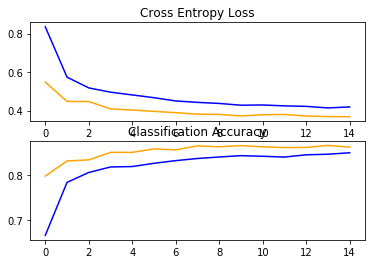

In [0]:
import sys
from matplotlib import pyplot
# plot loss
pyplot.subplot(211)
pyplot.title('Cross Entropy Loss')
pyplot.plot(X.history['loss'], color='blue', label='train')
pyplot.plot(X.history['val_loss'], color='orange', label='test')
# plot accuracy
pyplot.subplot(212)
pyplot.title('Classification Accuracy')
pyplot.plot(X.history['acc'], color='blue', label='train')
pyplot.plot(X.history['val_acc'], color='orange', label='test')
pyplot.show()

In [0]:

flag = True

for layer in trained_model.layers:
  if flag:
    layer.trainable = False
  if layer.name == 'block4_conv1':
    flag = False

In [0]:
from tensorflow.keras.optimizers import Adam

model.compile(loss="categorical_crossentropy",
              optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.01, amsgrad=False),
              metrics=['accuracy'])

In [0]:
X = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=15,
      validation_data=test_generator,
      validation_steps=50,
      verbose=2)

Epoch 1/15
100/100 - 252s - loss: 0.4763 - acc: 0.8248 - val_loss: 0.3682 - val_acc: 0.8690
Epoch 2/15
100/100 - 234s - loss: 0.4189 - acc: 0.8399 - val_loss: 0.3795 - val_acc: 0.8640
Epoch 3/15
100/100 - 234s - loss: 0.4040 - acc: 0.8505 - val_loss: 0.3690 - val_acc: 0.8657
Epoch 4/15
100/100 - 234s - loss: 0.3974 - acc: 0.8519 - val_loss: 0.3723 - val_acc: 0.8610
Epoch 5/15
100/100 - 234s - loss: 0.3851 - acc: 0.8600 - val_loss: 0.3485 - val_acc: 0.8723
Epoch 6/15
100/100 - 233s - loss: 0.3808 - acc: 0.8598 - val_loss: 0.3483 - val_acc: 0.8707
Epoch 7/15
100/100 - 234s - loss: 0.3816 - acc: 0.8593 - val_loss: 0.3500 - val_acc: 0.8737
Epoch 8/15
100/100 - 234s - loss: 0.3865 - acc: 0.8577 - val_loss: 0.3478 - val_acc: 0.8723
Epoch 9/15
100/100 - 237s - loss: 0.3677 - acc: 0.8614 - val_loss: 0.3525 - val_acc: 0.8663
Epoch 10/15
100/100 - 234s - loss: 0.3778 - acc: 0.8625 - val_loss: 0.3442 - val_acc: 0.8727
Epoch 11/15
100/100 - 235s - loss: 0.3654 - acc: 0.8639 - val_loss: 0.3600 - va